In [39]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [40]:
import numpy as np
import pandas as pd

In [41]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [42]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import create_engine,inspect

In [43]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

inspector = inspect(engine)
inspector



In [44]:

inspector.get_table_names()


['measurement', 'station']

In [45]:
conn = engine.connect()
import pandas as pd
measurementdf = pd.read_sql("SELECT * FROM measurement", conn)
measurementdf.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [46]:
conn = engine.connect()
stationdf = pd.read_sql("SELECT * FROM station", conn)
stationdf.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [27]:
# We can view all of the classes that automap found
Base = automap_base()



In [28]:
# Reflect the Tables
Base.prepare(engine, reflect=True)



In [29]:
# View All of the Classes that Automap Found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save References to Each Table
measurement = Base.classes.measurement
station = Base.classes.station


In [31]:
# Create our session (link) from Python to the DB

session = Session(engine)

# Exploratory Climate Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [33]:
# finding last date and one year ago date from data
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date



('2017-08-23')

In [34]:
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)
one_year_ago

datetime.date(2016, 8, 23)

In [37]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
measurement
Rain_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_ago).\
    order_by(measurement.date).all()


In [70]:
Rain_data_df = pd.DataFrame(Rain_data, columns=["Date","Precipitation"])
Rain_data_df.set_index("Date", inplace=True,)
Rain_data_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


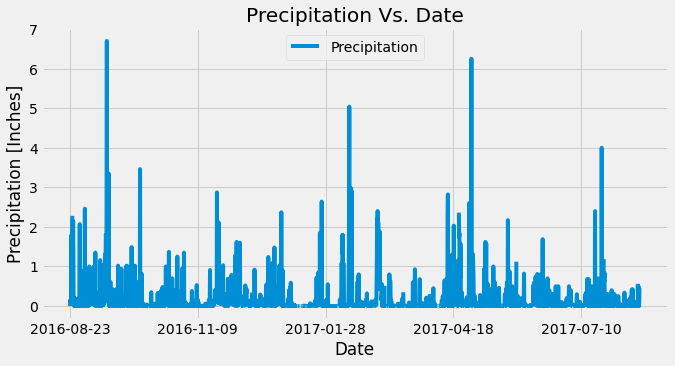

In [73]:
Rain_data_df.plot(title="Precipitation Vs. Date", figsize=(10,5))
plt.ylabel("Precipitation [Inches]")
plt.xlabel("Date")

plt.legend(loc='upper center')
plt.savefig("Images/Rainfallhawaii.png")
plt.show()

In [69]:
# Use Pandas to calcualte the summary statistics for the precipitation data

Summary = measurementdf["prcp"].describe()
# Max = measurementdf["prcp"].max()
# Mean = measurementdf["prcp"].mean()
# Median = measurementdf["prcp"].median()

Summary



count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [82]:
# Design a query to show how many stations are available in this dataset?
Station_No=stationdf["id"].count()
Station_No




9

In [138]:
stationdf

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [88]:
measurementdf.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [91]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

# Grouped = mergestationdf#.groupby(id).count()
Grouped = stationdf.merge(measurementdf, left_on='station', right_on='station')
Grouped.head()

,id_x,station,name,latitude,longitude,elevation,id_y,date,prcp,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,1,2010-01-01,0.08,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2,2010-01-02,0.00,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,3,2010-01-03,0.00,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,4,2010-01-04,0.00,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,5,2010-01-06,NaN,73.0


In [104]:
Grouped2 = Grouped.groupby('id_x').count()
Grouped2.sort_values("station", axis = 0, ascending = False,
                 inplace = True, na_position ='last')



Grouped2


,station,name,latitude,longitude,elevation,id_y,date,prcp,tobs
id_x,,,,,,,,,
7,2772,2772,2772,2772,2772,2772,2772,2772,2772
1,2724,2724,2724,2724,2724,2724,2724,2685,2724
2,2709,2709,2709,2709,2709,2709,2709,2696,2709
6,2669,2669,2669,2669,2669,2669,2669,2572,2669
9,2612,2612,2612,2612,2612,2612,2612,2484,2612
3,2202,2202,2202,2202,2202,2202,2202,1937,2202
8,1979,1979,1979,1979,1979,1979,1979,1932,1979
4,1372,1372,1372,1372,1372,1372,1372,683,1372
5,511,511,511,511,511,511,511,342,511


In [121]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# most active station is 7
is_7 =  Grouped['id_x']==7
Weather_St_7 = Grouped[is_7]
Weather_St_7.head()

,id_x,station,name,latitude,longitude,elevation,id_y,date,prcp,tobs
12187,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,12188,2010-01-01,0.15,70.0
12188,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,12189,2010-01-02,0.00,62.0
12189,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,12190,2010-01-03,0.00,74.0
12190,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,12191,2010-01-04,0.00,75.0
12191,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,12192,2010-01-05,0.00,74.0


In [122]:
Weather_St_7["tobs"].describe()

count    2772.000000
mean       71.663781
std         4.357642
min        54.000000
25%        69.000000
50%        72.000000
75%        74.000000
max        85.000000
Name: tobs, dtype: float64

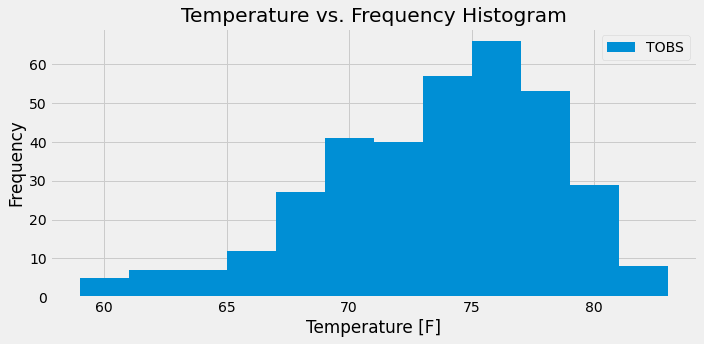

In [124]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# station id 7. USC00519281

temp_data = session.query(measurement.tobs).\
    filter(measurement.date >= one_year_ago).\
    filter(measurement.station == "USC00519281").\
    order_by(measurement.date).all()

# Save the Query Results as a Pandas DataFrame
temp_data_df = pd.DataFrame(temp_data, columns=["TOBS"])

# Plot the Results as a Histogram with `bins=12`
temp_data_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram", figsize=(10,5))
plt.xlabel("Temperature [F]")
plt.tight_layout()
plt.savefig("Images/Temperature_vs_Frequency.png")
plt.show()


## Bonus Challenge Assignment

In [125]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [126]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


SurfTemp = calc_temps("2014-01-14", "2014-03-28")
SurfTemp

[(57.0, 69.20761904761905, 83.0)]

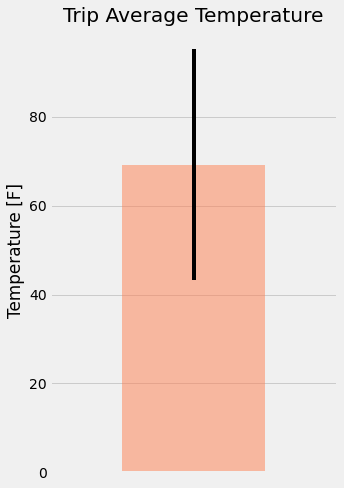

In [128]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

SurfTemp_df = pd.DataFrame(SurfTemp, columns=["TMIN", "TAVG", "TMAX"])

SurfTemp_df.plot.bar(y="TAVG", yerr=(SurfTemp_df["TMAX"] - SurfTemp_df["TMIN"]), 
                    title="Trip Average Temperature", color="coral", 
                    alpha=0.5, figsize=(5,7), legend=None)
plt.xticks([])
plt.ylabel("Temperature [F]")
plt.tight_layout()
plt.savefig("Images/triptemperature.png")
plt.show()


In [159]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
#  func.avg(measurement.prcp), func.max(measurement.prcp)

def calcprcpUSC00519397(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.max(measurement.prcp)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).filter(measurement.station == "USC00519397").all()

# function usage example
print(calcprcpUSC00519397('2012-02-28', '2012-03-05'))


[(1.08,)]


In [150]:
def calcprcpUSC00513117(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.max(measurement.prcp)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).filter(measurement.station == "USC00513117").all()

# function usage example
print(calcprcpUSC00513117('2012-02-28', '2012-03-05'))

[(5.71,)]


In [151]:
def calcprcpUSC00514830(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.max(measurement.prcp)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).filter(measurement.station == "USC00514830").all()

# function usage example
print(calcprcpUSC00514830('2012-02-28', '2012-03-05'))

[(0.03,)]


In [152]:
def calcprcpUSC00517948(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.max(measurement.prcp)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).filter(measurement.station == "USC00517948").all()

# function usage example
print(calcprcpUSC00517948('2012-02-28', '2012-03-05'))

[(0.0,)]


In [153]:
def calcprcpUSC00518838(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.max(measurement.prcp)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).filter(measurement.station == "USC00518838").all()

# function usage example
print(calcprcpUSC00518838('2012-02-28', '2012-03-05'))




[(2.7,)]


In [154]:
def calcprcpUSC00519523(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.max(measurement.prcp)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).filter(measurement.station == "USC00519523").all()

# function usage example
print(calcprcpUSC00519523('2012-02-28', '2012-03-05'))

[(2.71,)]


In [155]:
def calcprcpUSC00519281(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.max(measurement.prcp)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).filter(measurement.station == "USC00519281").all()

# function usage example
print(calcprcpUSC00519281('2012-02-28', '2012-03-05'))



[(6.24,)]


In [156]:
def calcprcpUSC00511918(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.max(measurement.prcp)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).filter(measurement.station == "USC00511918").all()

# function usage example
print(calcprcpUSC00511918('2012-02-28', '2012-03-05'))

[(0.7,)]


In [157]:
def calcprcpUSC00516128(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.max(measurement.prcp)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).filter(measurement.station == "USC00516128").all()

# function usage example
print(calcprcpUSC00516128('2012-02-28', '2012-03-05'))

 

[(5.37,)]


In [158]:
St1USC00519397 = calcprcpUSC00519397("2014-01-14", "2014-03-28")
St1USC00513117 = calcprcpUSC00513117("2014-01-14", "2014-03-28")
St1USC00514830 = calcprcpUSC00514830("2014-01-14", "2014-03-28")
St1USC00517948 = calcprcpUSC00517948("2014-01-14", "2014-03-28")
St1USC00518838 = calcprcpUSC00518838("2014-01-14", "2014-03-28")
St1USC00519523 = calcprcpUSC00519523("2014-01-14", "2014-03-28")
St1USC00519281 = calcprcpUSC00519281("2014-01-14", "2014-03-28")
St1USC00511918 = calcprcpUSC00511918("2014-01-14", "2014-03-28")
St1USC00516128 = calcprcpUSC00516128("2014-01-14", "2014-03-28")


print(St1USC00519397,St1USC00513117,St1USC00514830,St1USC00517948,St1USC00518838,St1USC00519523,St1USC00519281,St1USC00511918,St1USC00516128)

[(0.64,)] [(1.7,)] [(1.12,)] [(1.65,)] [(0.41,)] [(1.81,)] [(3.86,)] [(0.78,)] [(3.4,)]


In [161]:
stationdf["Total Rain Inches"] = [St1USC00519397,St1USC00513117,St1USC00514830,St1USC00517948,St1USC00518838,St1USC00519523,St1USC00519281,St1USC00511918,St1USC00516128]

In [162]:
stationdf


,id,station,name,latitude,longitude,elevation,Total Rain Inches
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0,"[(0.64,)]"
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6,"[(1.7,)]"
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0,"[(1.12,)]"
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9,"[(1.65,)]"
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6,"[(0.41,)]"
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5,"[(1.81,)]"
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9,"[(3.86,)]"
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9,"[(0.78,)]"
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4,"[(3.4,)]"


In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
